In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A.I. Linear regression

In [2]:
# Part A1
dataA_file = ("/Users/alisatodorova/surfdrive/Year 1/IS-ML/group13-assignment1/PartA/dataA.xlsx")
sheet = "Sheet5"
df = pd.read_excel(dataA_file, sheet_name=sheet, usecols=[0, 1])

start_row = 242
end_row = 261
extract_columns = ["X", "Y"]

selected_rows = df.iloc[start_row - 1 : end_row, df.columns.isin(extract_columns)]

print(selected_rows)

         X       Y
241  23.10  452.17
242  27.13  434.47
243  26.95  436.80
244  19.40  459.76
245  13.50  468.85
246  11.97  468.81
247  18.11  454.29
248  24.10  442.80
249  20.29  445.52
250  21.82  447.43
251  29.45  437.31
252  10.87  477.03
253  17.36  456.57
254  24.97  440.03
255  13.72  466.24
256  26.49  440.21
257   8.25  475.17
258  12.80  466.95
259  17.08  457.81
260  31.40  433.34


In [3]:
#Part A2
dataA1 = selected_rows
min_max = (dataA1 - dataA1.min()) / (dataA1.max() - dataA1.min())

print("\n Min-Max data Normalization")
print(min_max)


 Min-Max data Normalization
            X         Y
241  0.641469  0.430991
242  0.815551  0.025864
243  0.807775  0.079194
244  0.481641  0.604715
245  0.226782  0.812772
246  0.160691  0.811856
247  0.425918  0.479515
248  0.684665  0.216526
249  0.520086  0.278782
250  0.586177  0.322499
251  0.915767  0.090867
252  0.113175  1.000000
253  0.393521  0.531701
254  0.722246  0.153124
255  0.236285  0.753033
256  0.787905  0.157244
257  0.000000  0.957427
258  0.196544  0.769284
259  0.381425  0.560082
260  1.000000  0.000000


Theta:[-1.08267452  0.99839588]
Slope:-1.082674517460251 and y-intercept:0.9983958811691596
Regression Line: Y = -1.08 * X + 1.00


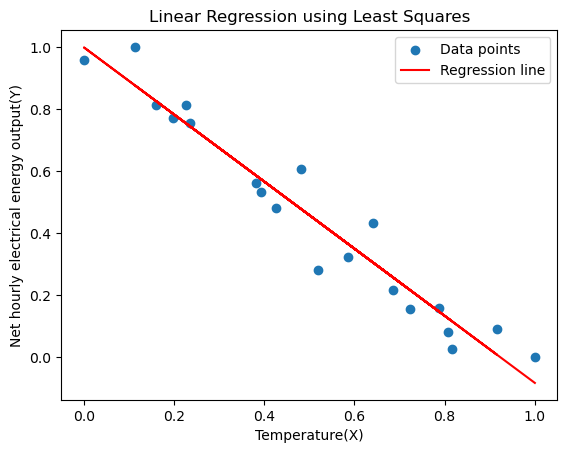

In [5]:
# Part A3
x = min_max["X"].values
y = min_max["Y"].values

# The intercept term
X = np.vstack([x, np.ones(len(x))]).T

# Model parameters for Closed-form solution
theta = np.dot((np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)), y)
print(f"Theta:{theta}")

# Extract the slope (m) and the y-intercept (b)
m, b = theta
print(f"Slope:{m} and y-intercept:{b}")

print(f"Regression Line: Y = {m:.2f} * X + {b:.2f}")

# Plot the data points
plt.scatter(x, y, label="Data points")

# Plot the regression line
y_pred = m * x + b
plt.plot(x, y_pred, color="red", label="Regression line")  # regression line
plt.title("Linear Regression using Least Squares")
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.legend()
plt.show()

In [6]:
# Part A4

# Mean Square Error cost function
def costFunction(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)  # predicted values
    cost = (1 / 2 * m) * np.sum(np.square(y_pred - y))
    return cost


# Gradient Descent for Linear Regression
# alpha = learning parameter; iter = number of iterations
def gradientDescent(X, y, theta, alpha, iter):
    m = len(y)
    X_Trans = X.transpose()
    costHist = [0] * iter  # stores cost function ot each iter

    for i in range(0, iter):
        y_pred = X.dot(theta)  # predicted values
        loss = y_pred - y  # predicted-actual

        # Partial derivatives of the cost function
        # with respect to each of the regression parameters,
        # and update parameters
        theta[0] = theta[0] - alpha * (np.sum(loss) / m)
        theta[1] = theta[1] - alpha * (np.dot(X_Trans[1], loss) / m)

        # Update Mean Square Error Cost Function
        costHist[i] = costFunction(X, y, theta)

    return theta, costHist

Theta for task A5:[0, 2]
Updated theta[0]:-0.015482261387045084
Updated theta[1]:1.9845177386129549
Cost:[484.3801293281862]


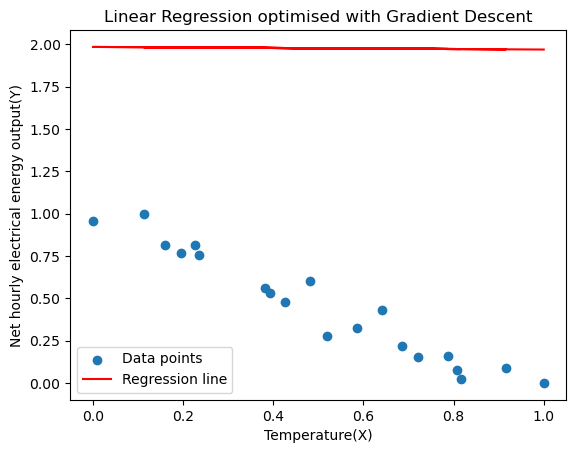

In [7]:
# Part A5

np.random.seed(14)  # for reproduction
theta_A5 = [0, 2]  # theta for task A5
print(f"Theta for task A5:{theta_A5}")

theta5, cost5 = gradientDescent(X, y, theta_A5, alpha=0.01, iter=1)
theta5_updated_0 = theta5[0]
theta5_updated_1 = theta5[1]

print(f"Updated theta[0]:{theta5_updated_0}")
print(f"Updated theta[1]:{theta5_updated_1}")
print(f"Cost:{cost5}")

# Plotting
y_pred = theta5_updated_0 * x + theta5_updated_1
# print(f"y_pred:{y_pred}")
plt.scatter(x, y, label="Data points")
plt.plot(x, np.dot(X, theta5), color="red", label="Regression line")  # regression line
plt.title("Linear Regression optimised with Gradient Descent")
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.legend()
plt.show()

Theta for task A6:[-0.015482261387045084, 1.9845177386129549]
Updated theta[0]:-0.03073153313167035
Updated theta[1]:1.9692684668683296
Cost:[469.9727947869858]


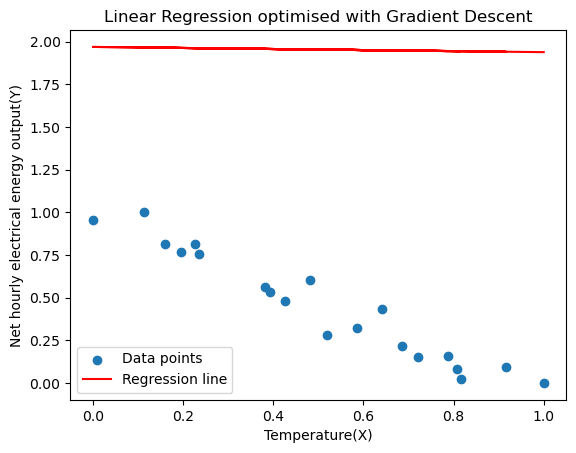

In [8]:
# Part A6

np.random.seed(14)  # for reproduction
theta_A6 = [theta5_updated_0, theta5_updated_1]  # theta for task A6
print(f"Theta for task A6:{theta_A6}")

theta6, cost6 = gradientDescent(
    X, y, [theta5_updated_0, theta5_updated_1], alpha=0.01, iter=1
)
theta6_updated_0 = theta6[0]
theta6_updated_1 = theta6[1]

print(f"Updated theta[0]:{theta6_updated_0}")
print(f"Updated theta[1]:{theta6_updated_1}")
print(f"Cost:{cost6}")

# Plotting
y_pred = theta6_updated_0 * x + theta6_updated_1
# print(f"y_pred:{y_pred}")
plt.scatter(x, y, label="Data points")
plt.plot(x, np.dot(X, theta6), color="red", label="Regression line")  # regression line
plt.title("Linear Regression optimised with Gradient Descent")
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.legend()
plt.show()

Theta for task A7:[-0.03073153313167035, 1.9692684668683296]
Updated theta0:-0.045751321451224666
Updated theta1:1.9542486785487752
Cost:[455.9954360146059]


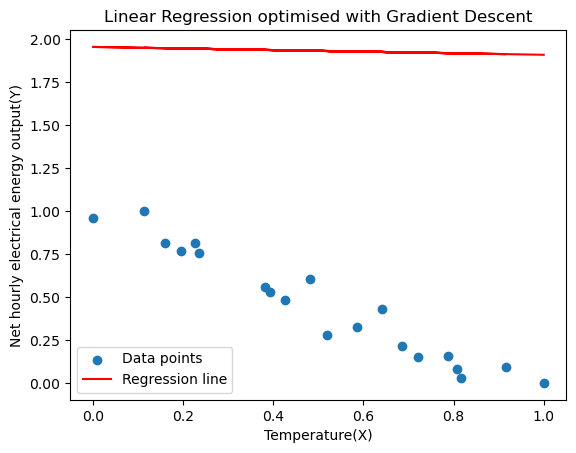

In [9]:
# Part A7

np.random.seed(14)  # for reproduction
theta_A7 = [theta6_updated_0, theta6_updated_1]  # theta for task A7
print(f"Theta for task A7:{theta_A7}")

theta7, cost7 = gradientDescent(
    X, y, [theta6_updated_0, theta6_updated_1], alpha=0.01, iter=1
)
theta7_updated_0 = theta7[0]
theta7_updated_1 = theta7[1]

print(f"Updated theta0:{theta7_updated_0}")
print(f"Updated theta1:{theta7_updated_1}")
print(f"Cost:{cost7}")

# Plotting
y_pred = theta7_updated_0 * x + theta7_updated_1
# print(f"y_pred:{y_pred}")
plt.scatter(x, y, label="Data points")
plt.plot(x, np.dot(X, theta7), color="red", label="Regression line")  # regression line
plt.title("Linear Regression optimised with Gradient Descent")
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.legend()
plt.show()

Theta for task A8:[-0.045751321451224666, 1.9542486785487752]
Updated theta0:-1.0285681082557068
Updated theta1:0.9714318917442913
Cost:[442.4352149759418, 429.2796770349892, 416.5167395035933, 404.13468053223664, 392.1221283326555, 380.4680507223678, 369.1617449815001, 358.1928280125835, 347.5512267942708, 337.22716912019166, 327.21117461443305, 317.49404601537935, 308.0668607198964, 298.9209625800845, 290.04795394505385, 281.43968794040603, 273.0882609783186, 264.98600549134727, 257.12548288326155, 249.499476690431, 242.10098594747407, 234.9232187510671, 227.95958601599517, 221.20369541770233, 214.6493455157699, 208.29052005291942, 202.12138242429674, 196.13627031195136, 190.3296904795765, 184.69631372272246, 179.2309699698403, 173.9286435296496, 168.7844684804603, 163.7937241972077, 158.95183101208858, 154.25434600480597, 149.6969589185525, 145.27548819797647, 140.9858771454861, 136.8241901923585, 132.7866092812231, 128.86943035659374, 125.06905996022134, 121.38201192813641, 117.804

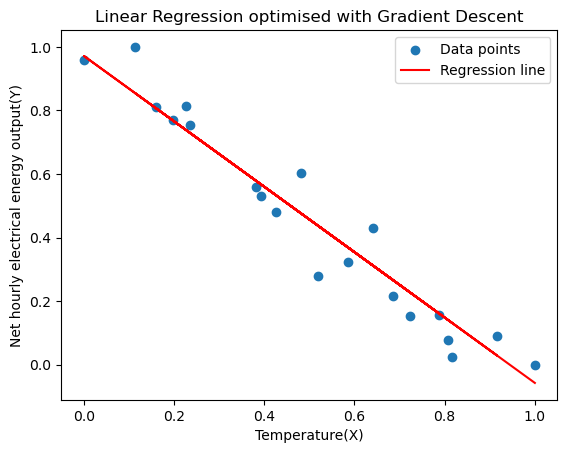

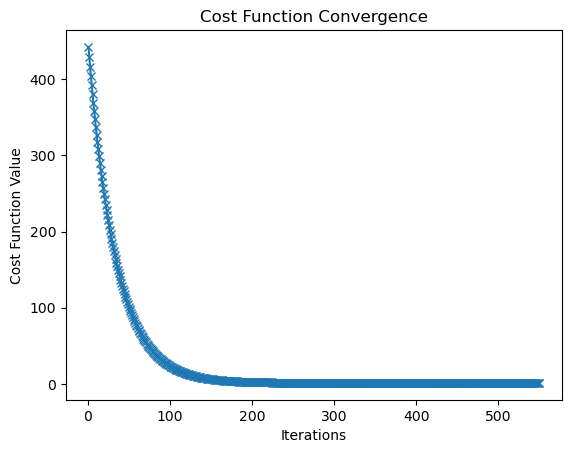

In [23]:
# Part A8

np.random.seed(14)  # for reproduction
theta_A8 = [theta7_updated_0, theta7_updated_1]  # theta for task A8
print(f"Theta for task A8:{theta_A8}")

iterations = 550 # Number of iterations

theta8, cost8 = gradientDescent(
    X, y, [theta7_updated_0, theta7_updated_1], alpha=0.01, iter=iterations
)
theta8_updated_0 = theta8[0]
theta8_updated_1 = theta8[1]

print(f"Updated theta0:{theta8_updated_0}")
print(f"Updated theta1:{theta8_updated_1}")
print(f"Cost:{cost8}")

# Plotting the regression line and the data
y_pred = theta8_updated_0 * x + theta8_updated_1
# print(f"y_pred:{y_pred}")
plt.scatter(x, y, label="Data points")
plt.plot(x, np.dot(X, theta8), color="red", label="Regression line")  # regression line
plt.title("Linear Regression optimised with Gradient Descent")
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.legend()
plt.show()

# Plotting the values of the cost function for all iterations
plt.plot(range(1, iterations+1), cost8, marker="x")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function Convergence")
plt.show()

A.II. Polynomial regression

In [4]:
np.random.seed(14)  # for reproduction

import numpy as np
import matplotlib.pyplot as plt

# Data
x = min_max["X"].values
y = min_max["Y"].values

# Feature scaling
x_scaled = (x - np.mean(x)) / np.std(x)

# The intercept term
X = np.vstack([x_scaled**2, x_scaled, np.ones(len(x_scaled))]).T

theta_poly_initial = [0, 2, 1]
print(f"Initial theta for polynomial regression: {theta_poly_initial}")

# Predicted values
def hypothesis(theta_poly, X):
    return theta_poly[0] * X[:, 0] + theta_poly[1] * X[:, 1] + theta_poly[2]

# The given cost function
def cost_function(theta_poly, X, y):
    m = len(y)
    error = hypothesis(theta_poly, X) - y
    return (1 / (4 * m)) * np.sum(error**4)


# Gradient Descent for Polynomial Regression
def gradient_descent(theta_poly, X, y, alpha_poly, iter_poly):
    m = len(y)
    costHist = [0] * iter_poly  # stores cost function ot each iter
    for i in range(iter_poly):
        loss = hypothesis(theta_poly, X) - y

        # Partial derivatives of the cost function
        # with respect to each of the regression parameters
        d_theta2 = np.sum(loss * (X[:, 0] ** 3)) / m
        d_theta1 = np.sum(loss * X[:, 1]) / m
        d_theta0 = np.sum(loss) / m

        # Update parameters
        theta_poly[0] = theta_poly[0] - alpha_poly * d_theta2
        theta_poly[1] = theta_poly[1] - alpha_poly * d_theta1
        theta_poly[2] = theta_poly[2] - alpha_poly * d_theta0

        # Update the cost function
        costHist[i] = cost_function(theta_poly, X, y)

    return theta_poly, costHist

Initial theta for polynomial regression: [0, 2, 1]


Updated theta:[-0.01619719839065062, 1.9769442704730824, 0.9945177386129549]
Cost:[14.363477901516427]


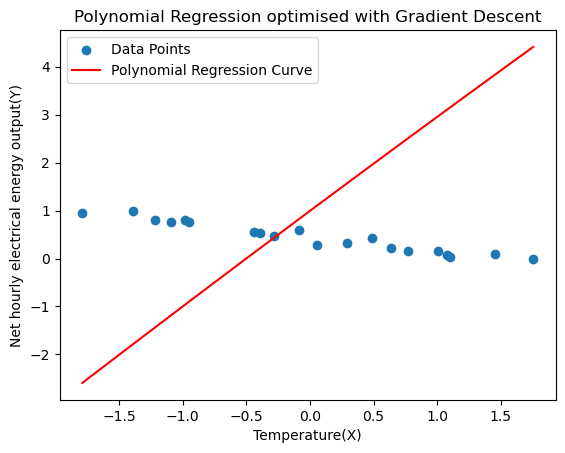

In [5]:
# Iteration 1
theta_poly1, cost_poly1 = gradient_descent(
    theta_poly_initial, X, y, alpha_poly=0.01, iter_poly=1
)
print(f"Updated theta:{theta_poly1}")
print(f"Cost:{cost_poly1}")

# Curve for plotting
x_curve = np.linspace(min(x_scaled), max(x_scaled), 1000)
X_curve = np.vstack([x_curve**2, x_curve, np.ones(len(x_curve))]).T
y_curve = hypothesis(theta_poly1, X_curve)


plt.scatter(x_scaled, y, label="Data Points")
plt.plot(
    x_curve, y_curve, color="red", label="Polynomial Regression Curve"
)  # Regression curve
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.title("Polynomial Regression optimised with Gradient Descent")
plt.legend()
plt.show()

Updated theta:[-0.030259293636409043, 1.954114349752158, 0.9892522718236868]
Cost:[13.624074018191372]


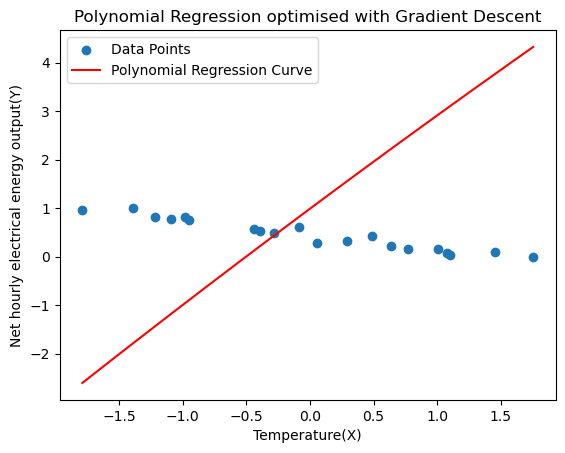

In [6]:
# Iteration 2

theta_poly2, cost_poly2 = gradient_descent(
    theta_poly1, X, y, alpha_poly=0.01, iter_poly=1
)
print(f"Updated theta:{theta_poly2}")
print(f"Cost:{cost_poly2}")

# Curve for plotting
x_curve = np.linspace(min(x_scaled), max(x_scaled), 1000)
X_curve = np.vstack([x_curve**2, x_curve, np.ones(len(x_curve))]).T
y_curve = hypothesis(theta_poly2, X_curve)


plt.scatter(x_scaled, y, label="Data Points")
plt.plot(
    x_curve, y_curve, color="red", label="Polynomial Regression Curve"
)  # Regression curve
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.title("Polynomial Regression optimised with Gradient Descent")
plt.legend()
plt.show()

Updated theta:[-0.04245373185504232, 1.931508605691638, 0.9841800806547689]
Cost:[12.951172878291727]


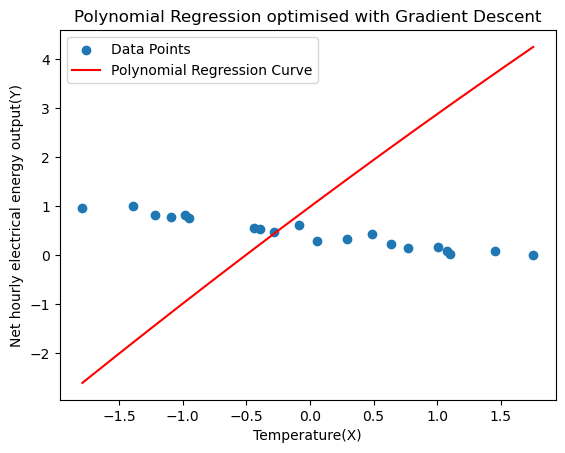

In [7]:
# Iteration 3
theta_poly3, cost_poly3 = gradient_descent(
    theta_poly2, X, y, alpha_poly=0.01, iter_poly=1
)
print(f"Updated theta:{theta_poly3}")
print(f"Cost:{cost_poly3}")

# Curve for plotting
x_curve = np.linspace(min(x_scaled), max(x_scaled), 1000)
X_curve = np.vstack([x_curve**2, x_curve, np.ones(len(x_curve))]).T
y_curve = hypothesis(theta_poly3, X_curve)


plt.scatter(x_scaled, y, label="Data Points")
plt.plot(
    x_curve, y_curve, color="red", label="Polynomial Regression Curve"
)  # Regression curve
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.title("Polynomial Regression optimised with Gradient Descent")
plt.legend()
plt.show()

Updated theta:[0.011590873651061167, -0.2965364595046681, 0.44898909201763565]
Cost:[12.33371770292137, 11.763063498514175, 11.232406403949538, 10.736352369352666, 10.27059046774466, 9.831644940321835, 9.416686596303666, 9.023389036275843, 8.649818782978745, 8.294351105573785, 7.955605347188477, 7.632395083899301, 7.323689584210301, 7.028583896537367, 6.746275538962059, 6.47604625337774, 6.217247654597919, 5.969289883602298, 5.731632585034891, 5.503777688990176, 5.285263598539913, 5.075660476778336, 4.874566397484474, 4.681604177158545, 4.4964187472138, 4.318674956537388, 4.148055718772475, 3.984260437257743, 3.827003654906406, 3.6760138874135784, 3.5310326068059994, 3.391813349068504, 3.2581209248358585, 3.1297307162615216, 3.0064280464226636, 2.8880076101889167, 2.774272957521753, 2.665036021797346, 2.5601166870479495, 2.459342389063934, 2.3625477461444677, 2.2695742159710037, 2.180269775636754, 2.0944886223228654, 2.01209089248789, 1.9329423977474212, 1.8569143758778328, 1.783883255

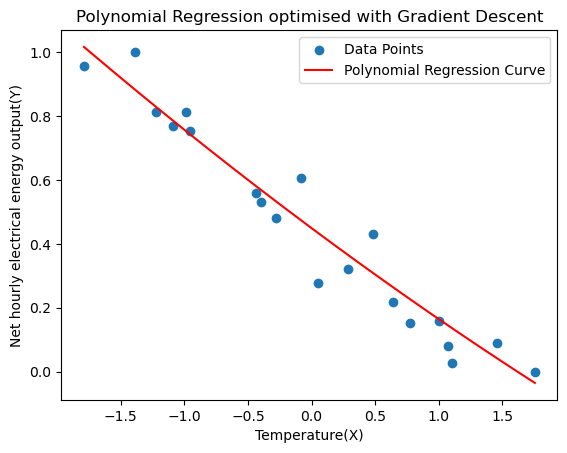

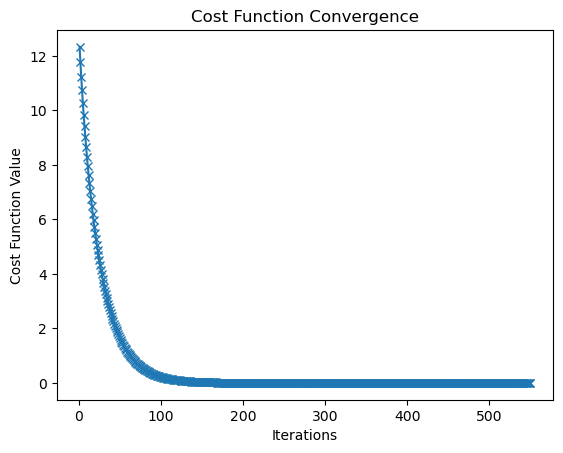

In [8]:
# Iterations until the regression line fits well the data
iterations = 550
theta_poly4, cost_poly4 = gradient_descent(
    theta_poly_initial, X, y, alpha_poly=0.01, iter_poly=iterations
)
print(f"Updated theta:{theta_poly4}")
print(f"Cost:{cost_poly4}")

# Curve for plotting
x_curve = np.linspace(min(x_scaled), max(x_scaled), 1000)
X_curve = np.vstack([x_curve**2, x_curve, np.ones(len(x_curve))]).T
y_curve = hypothesis(theta_poly4, X_curve)


plt.scatter(x_scaled, y, label="Data Points")
plt.plot(
    x_curve, y_curve, color="red", label="Polynomial Regression Curve"
)  # Regression curve
plt.xlabel("Temperature(X)")
plt.ylabel("Net hourly electrical energy output(Y)")
plt.title("Polynomial Regression optimised with Gradient Descent")
plt.legend()
plt.show()

# Plotting the values of the cost function for all iterations
plt.plot(range(1, iterations+1), cost_poly4, marker="x")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function Convergence")
plt.show()